# Protein Exercise 2

## Protein Sequences - Exploring Similarity

In class 1, we analyzed a protein's sequence, secondary structure, isoelectric point and atomic composition. In class 2, we will compare protein sequences and explore their similarities.

In [2]:
# Install necessary libraries
!pip install biopython

# Import libraries
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
import requests

# Function to fetch protein sequences from UniProt
def fetch_protein_sequence(accession_id):
    url = f"https://www.uniprot.org/uniprot/{accession_id}.fasta"
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception if there's an error in the HTTP request
    return response.text

# Fetch protein sequences
accession_ids = ["P0DTD1", "P59594"]  # Replace with the UniProt accession IDs you want to download
protein_sequences = []
for accession_id in accession_ids:
    sequence = fetch_protein_sequence(accession_id)
    protein_sequences.append(sequence)

# Align sequences
alignments = pairwise2.align.globalxx(protein_sequences[0], protein_sequences[1])

# Print alignments
for alignment in alignments:
    print(format_alignment(*alignment))


>sp|P0DTD1-----|R1AB-----_SARS2 Re-plicas-e po-ly--protein 1ab OS=Severe acute respiratory syndrome coronavirus 2 OX=269704--9 GN=rep- PE=1 SV=1
MESLVPGFNEKTHVQLSLPVLQVRDVLVRG-FGDSVEEVLSEARQHLKDGTCGLVEVEKGV
LPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRK
VLLRKNGNKGAGGH-SYGADLKSFDLGDELG--T--DPYEDF-QENW--N-TK-H-SSGVTRELMRELNGG
A-YTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAW
YTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRI
RSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGY-L
PQNAVVKI-YCPACHNSEVGPEHSLAEYHNESGLKTILRKGGR-TIAFGGCVFSYVGCHNKC
AYWVPRASAN-IGCNHTGVVGEGSE-GLNDNLLEILQKEK-VNINIVGD-FKLNEEIAI--ILAS-F
SASTSAFVETVKGLDYKAFKQIVE-SCGNFKVTKGKAKK--GAWNIGEQKSILSPLYAFASEA
ARVVRSIF-SRTLETAQ-NSVRVLQ-KAAITILDGISQYSLRL-IDAMMFTSDLAT--NNLVVMAY
ITGGVVQLTSQWL-TNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTC-ACEIV
GGQIVTCAKEIKESVQTFFKLVNKFLA-LCADSIIIGGAKLKALNLGET-FVTHSKGLYRKC
--VKSREETGLLMPLKAPKEIIFLE-GETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVG
-TPVCINGLMLLEIK-DTEKYCA

The above code will fetch two protein sequences and then perform a sequence alignment on them using the pairwise2 module. The align.globalxx function aligns the sequences using a global alignment, which attempts to align every residue in every sequence. It uses the simplest scoring, with 1 for matches and 0 for mismatches. It will print the alignment of the sequences and their score.

## Protein 3D structure - Align and Superimpose

In [6]:
from Bio.PDB import PDBParser, Superimposer, Selection

# Create a PDB parser
parser = PDBParser()

# Parse the structures
structure1 = parser.get_structure("1AH0", "1AH0.pdb")
structure2 = parser.get_structure("2ZXE", "2ZXE.pdb")

# Select backbone atoms for superimposition
backbone1 = [atom for residue in structure1[0].get_residues() for atom in residue if atom.get_name() in ['N', 'CA', 'C']]
backbone2 = [atom for residue in structure2[0].get_residues() for atom in residue if atom.get_name() in ['N', 'CA', 'C']]

# Truncate the longer list of backbone atoms
if len(backbone1) != len(backbone2):
    min_length = min(len(backbone1), len(backbone2))
    backbone1 = backbone1[:min_length]
    backbone2 = backbone2[:min_length]

# Superimpose the structures
super_imposer = Superimposer()
super_imposer.set_atoms(backbone1, backbone2)
print("RMS:", super_imposer.rms)

# Apply the rotation and translation to the second structure
super_imposer.apply(structure2.get_atoms())

# Calculate the radius of gyration (Rg)
atom_coordinates = [atom.get_coord() for atom in structure2.get_atoms() if atom.get_name() == 'CA']
centroid = sum(atom_coordinates) / len(atom_coordinates)
rg = sum(((coord - centroid) ** 2).sum() for coord in atom_coordinates) / len(atom_coordinates)
rg = rg ** 0.5
print("Rg:", rg)


RMS: 34.252253475120845
Rg: 46.70705305717096


c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11049.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11086.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11100.
  warnings.warn(


The above code aligns and superimposes two protein structures, and prints the root mean square deviation (RMSD) between the structures after superimposition, which is a measure of the average distance between the atoms of the superimposed structures.

The first part of the code fetches two Protein Data Bank (PDB) files, which contain information about the 3D structures of proteins. It then uses the PDBParser to parse the PDB files and get the protein structures.

The second part of the code selects the backbone atoms of the proteins for superimposition. This is usually the most meaningful comparison between protein structures, as side chains can often adopt different conformations.

The final part of the code aligns the structures and then applies the optimal rotation and translation to the second structure to superimpose it on the first structure. The RMSD between the two structures is then calculated and printed.

Comments

    Pairwise sequence alignment is a fundamental tool in bioinformatics. Exploring similarities between sequences can give us insight into how related they might be, and help in predicting the function of unknown sequences based on their similarity to known ones.
    The RMSD from the superimposition is a good way of quantifying how similar two structures are, but it is not the only measure. The more complex the structures, the more caution should be used in interpreting the results.
    The code above focuses on comparing proteins but the same techniques can be used for other biological macromolecules like DNA and RNA.
    Encourage your students to explore different pairs of proteins and observe their similarities and differences. They might want to explore proteins from different species, or different proteins from the same organism. What can they infer about the relationship between these proteins based on their sequence and structural similarity?
    They could also try different methods of alignment - local alignment, which only aligns parts of the sequences that are most similar, or different scoring functions that give different weights to matches, mismatches, gaps and extensions.

In [7]:
import nglview as nv
from Bio.PDB import PDBIO

# Save the original and superimposed structure to a new PDB file
io = PDBIO()
io.set_structure(structure1)
io.save("1AH0_aligned.pdb")

io.set_structure(structure2)
io.save("2ZXE_aligned.pdb")

# Display the original and superimposed structures
view1 = nv.show_structure_file("1AH0_aligned.pdb")
view2 = nv.show_structure_file("2ZXE_aligned.pdb")

# Display the views
print("Structure 1:")
display(view1)

print("\nStructure 2:")
display(view2)



Structure 1:


NGLWidget()


Structure 2:


NGLWidget()

In [8]:
view = nv.show_structure_file("1AH0_aligned.pdb")
view.add_structure(nv.FileStructure("2ZXE_aligned.pdb"))
view


NGLWidget()

In [9]:
import nglview as nv
from Bio.PDB import PDBIO

# Save the original and superimposed structure to a new PDB file
io = PDBIO()
io.set_structure(structure1)
io.save("1AH0_aligned.pdb")

io.set_structure(structure2)
io.save("2ZXE_aligned.pdb")

# Display the original and superimposed structures
view = nv.show_structure_file("1AH0_aligned.pdb")
view.add_representation('cartoon', selection='protein', color='sstruc')  # Color by secondary structure
view.add_representation('surface', selection='protein', opacity=0.3)  # Add semi-transparent surface

# Add the second structure to the same view
structure2_view = nv.FileStructure("2ZXE_aligned.pdb")
view.add_structure(structure2_view)
view.add_representation('cartoon', selection='protein', color='sstruc', component=1)  # Color by secondary structure
view.add_representation('surface', selection='protein', opacity=0.3, component=1)  # Add semi-transparent surface

# Display the view
view


NGLWidget()

In this code, the add_representation function is used to add a new graphical representation to the protein. The selection parameter specifies which part of the protein the representation applies to. The color parameter specifies how to color the representation. 'sstruc' colors the protein based on its secondary structure, with helices, sheets, and coils each having different colors.

Adding a surface representation gives a sense of the overall shape of the protein, which can be useful for understanding its interactions with other molecules.

In the code provided, we added the second structure as a new component (component=1) to the same NGL view, so that you can see both structures at the same time in the same widget.

Note that this will give each protein a different visual representation, so you can distinguish between the two.

c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11049.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11086.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11100.
  warnings.warn(


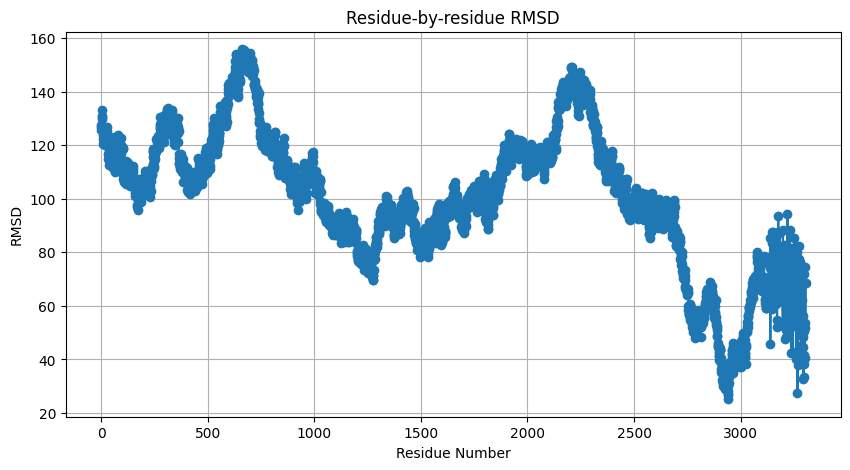

In [11]:
from Bio.PDB import PDBParser, Superimposer, Selection
import matplotlib.pyplot as plt
import numpy as np

# Parse the PDB files
parser = PDBParser()
structure1 = parser.get_structure("1AH0", "1AH0.pdb")
structure2 = parser.get_structure("2ZXE", "2ZXE.pdb")

# Extract alpha carbons
backbone1 = Selection.unfold_entities(structure1[0], 'A')  # all alpha carbon atoms from structure 1
backbone2 = Selection.unfold_entities(structure2[0], 'A')  # all alpha carbon atoms from structure 2

# Make sure both lists are of equal length
backbone1 = backbone1[:min(len(backbone1), len(backbone2))]
backbone2 = backbone2[:min(len(backbone1), len(backbone2))]

# Calculate residue-by-residue RMSD
rmsd_per_residue = [atom1 - atom2 for atom1, atom2 in zip(backbone1, backbone2)]

# Plot the RMSD values
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rmsd_per_residue)), rmsd_per_residue, '-o')
plt.title("Residue-by-residue RMSD")
plt.xlabel("Residue Number")
plt.ylabel("RMSD")
plt.grid(True)
plt.show()


In [12]:
!pip install biopython
!pip install numpy
!pip install matplotlib
!pip install seaborn

SyntaxError: invalid syntax (2098347559.py, line 1)

The code calculates and visualizes the contact maps for two protein structures (1AH0 and 2ZXE). Contact maps provide information about which residues in the protein are in close proximity to each other based on a distance cutoff. The heatmaps show a color-coded representation of the contact maps, where brighter colors indicate closer proximity between residues.

c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11049.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11086.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11100.
  warnings.warn(


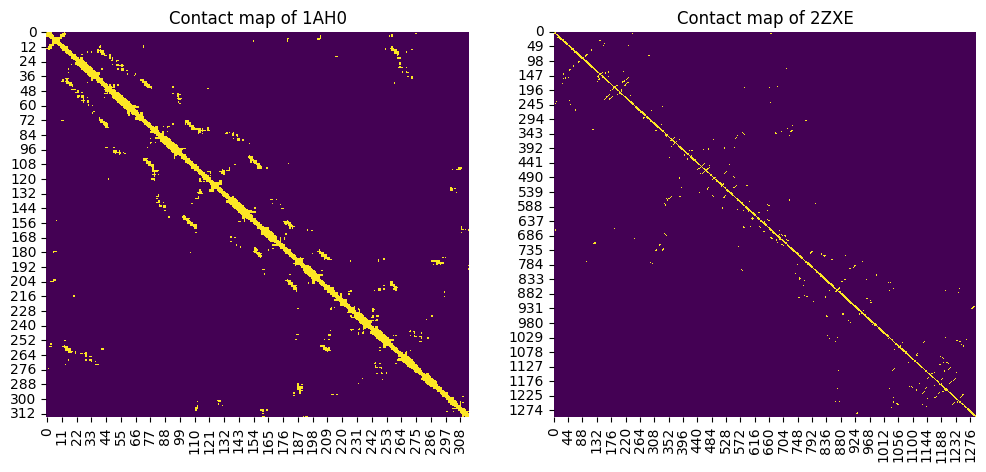

In [13]:
from Bio.PDB import PDBParser, Selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parse the PDB filesa
parser = PDBParser()
structure1 = parser.get_structure("1AH0", "1AH0.pdb")
structure2 = parser.get_structure("2ZXE", "2ZXE.pdb")

# Extract alpha carbons
backbone1 = [residue['CA'] for residue in structure1.get_residues() if 'CA' in residue]
backbone2 = [residue['CA'] for residue in structure2.get_residues() if 'CA' in residue]

# Define a distance cutoff (in Angstroms)
cutoff = 8.0

# Initialize contact maps
contact_map1 = np.zeros((len(backbone1), len(backbone1)))
contact_map2 = np.zeros((len(backbone2), len(backbone2)))

# Populate the contact maps
for i in range(len(backbone1)):
    for j in range(i, len(backbone1)):
        if backbone1[i] - backbone1[j] < cutoff:
            contact_map1[i, j] = 1
            contact_map1[j, i] = 1

for i in range(len(backbone2)):
    for j in range(i, len(backbone2)):
        if backbone2[i] - backbone2[j] < cutoff:
            contact_map2[i, j] = 1
            contact_map2[j, i] = 1

# Visualize the contact maps
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(contact_map1, ax=ax[0], cmap='viridis', cbar=False)
ax[0].set_title("Contact map of 1AH0")

sns.heatmap(contact_map2, ax=ax[1], cmap='viridis', cbar=False)
ax[1].set_title("Contact map of 2ZXE")

plt.show()


The code calculates and visualizes the Ramachandran plot for a protein structure specified by its PDB code. The Ramachandran plot provides insights into the conformation of protein backbone torsion angles (Phi and Psi) for each residue. The scatter plot shows the distribution of Phi and Psi angles, allowing you to analyze the secondary structure characteristics and identify regions with specific conformational properties.

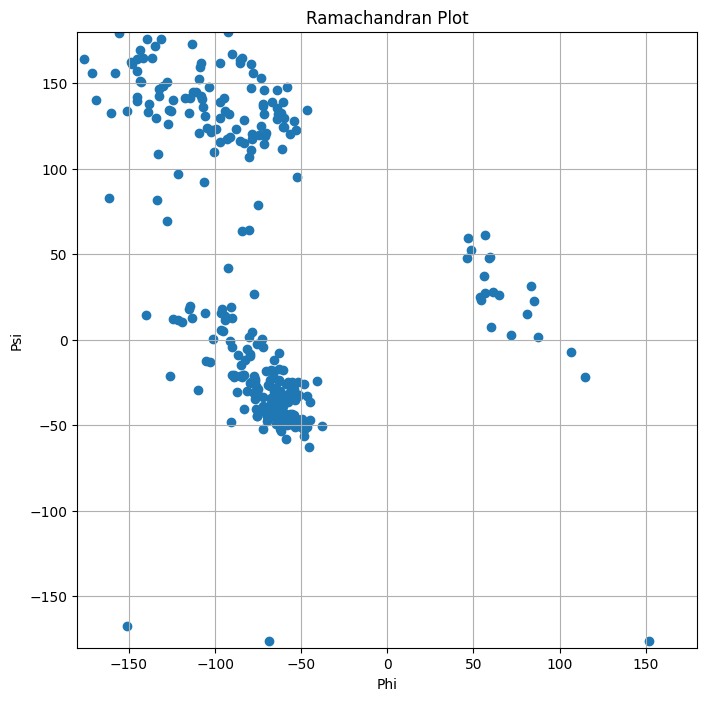

In [31]:
from Bio.PDB import PDBParser, PPBuilder
import matplotlib.pyplot as plt
import numpy as np

# Parsing the structure
pdb_code = '1AH0'  # Update this to match your PDB code
parser = PDBParser()
structure = parser.get_structure(pdb_code, f'{pdb_code}.pdb')  # Update path if needed

# Calculating Phi and Psi angles
phi_angles, psi_angles = [], []
for model in structure:
    for chain in model:
        polypeptides = PPBuilder().build_peptides(chain)
        for poly_index, poly in enumerate(polypeptides):
            phi_psi = poly.get_phi_psi_list()
            for res_index, residue in enumerate(poly):
                res_name = "%s:%s:%s" % (str(poly_index), residue.resname, residue.id[1])
                phi, psi = phi_psi[res_index]
                if phi and psi:  # Ignore None values
                    phi_angles.append(phi)
                    psi_angles.append(psi)

# Plotting the results
plt.figure(figsize=(8,8))
plt.scatter(np.rad2deg(phi_angles), np.rad2deg(psi_angles))
plt.title('Ramachandran Plot')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()


